Membaca Data

In [166]:
import pandas as pd 
df = pd.read_xml("../data/kompas-beritaPart1.xml")

df.head()

,sumber,tanggal,kategori,judul,isi,link,jumlahkata
0,kompas.com,2015/07/01,Teknologi,"Ponsel Huawei Honor 4C Dibanderol Rp 2,2 Juta","JAKARTA, KOMPAS.com Ponsel Android Huawei Hon...",http://tekno.kompas.com/read/xml/2015/07/01/18...,315
1,kompas.com,2015/07/01,Teknologi,Asosiasi: RPP E-commerce Tidak Sesuai Hasil Di...,"JAKARTA, KOMPAS.com - Sejak 2013, wacana tenta...",http://tekno.kompas.com/read/xml/2015/07/01/16...,419
2,kompas.com,2015/07/01,Teknologi,"Pemesan ""iPhone Jadi Sabun"" Karyawan Pesaing L...","JAKARTA, KOMPAS.com Danis Darusman, pelanggan ...",http://tekno.kompas.com/read/xml/2015/07/01/15...,265
3,kompas.com,2015/07/01,Teknologi,"""Autofeather Failure"", Momok bagi Pesawat Bali...",KOMPAS.com Salah satu momok yang dihadapi dala...,http://tekno.kompas.com/read/xml/2015/07/01/14...,481
4,kompas.com,2015/07/01,Teknologi,Laptop Bezel Tertipis di Dunia Masuk Indonesia,"JAKARTA, KOMPAS.com - Resmi diperkenalkan pada...",http://tekno.kompas.com/read/xml/2015/07/01/14...,227


Mencari Informasi Data

In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1502 entries, 0 to 1501
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   sumber      1502 non-null   object
 1   tanggal     1502 non-null   object
 2   kategori    1502 non-null   object
 3   judul       1502 non-null   object
 4   isi         1502 non-null   object
 5   link        1502 non-null   object
 6   jumlahkata  1502 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 82.3+ KB


Memeriksa nilai NaN dan Duplikat

In [168]:
df.isnull(). sum()

sumber        0
tanggal       0
kategori      0
judul         0
isi           0
link          0
jumlahkata    0
dtype: int64

Case Folding (mengubah huruf kapital menjadi huruf kecil)

In [169]:
def caseFolding(text):
    text = text.lower()
    return text

contoh = "Terima kasih, Kak! Kamu sangat baik sekali kepadaku hari ini."
print(f'original: {contoh}')
print(f'case folded: {caseFolding(contoh)}')


original: Terima kasih, Kak! Kamu sangat baik sekali kepadaku hari ini.
case folded: terima kasih, kak! kamu sangat baik sekali kepadaku hari ini.


Punctuation Removal

In [170]:
import re

def punctuationRemoval(text):
    text = re.sub(r'[^\w\s]', '', text)
    return text

def tokenize(text):
    return text.split()


contoh = "Terima kasih, Kak! Kamu sangat baik sekali kepadaku hari ini."
print(f'original: {contoh}')
print(f'punctuation removed: {punctuationRemoval(contoh)}')


original: Terima kasih, Kak! Kamu sangat baik sekali kepadaku hari ini.
punctuation removed: Terima kasih Kak Kamu sangat baik sekali kepadaku hari ini


Menerapkan Function

In [171]:
df['clean'] = df['isi'].apply(caseFolding)
df['clean'] = df['clean'].apply(punctuationRemoval)
df['tokens'] = df['clean'].apply(tokenize)



df.head()

,sumber,tanggal,kategori,judul,isi,link,jumlahkata,clean,tokens
0,kompas.com,2015/07/01,Teknologi,"Ponsel Huawei Honor 4C Dibanderol Rp 2,2 Juta","JAKARTA, KOMPAS.com Ponsel Android Huawei Hon...",http://tekno.kompas.com/read/xml/2015/07/01/18...,315,jakarta kompascom ponsel android huawei honor...,"[jakarta, kompascom, ponsel, android, huawei, ..."
1,kompas.com,2015/07/01,Teknologi,Asosiasi: RPP E-commerce Tidak Sesuai Hasil Di...,"JAKARTA, KOMPAS.com - Sejak 2013, wacana tenta...",http://tekno.kompas.com/read/xml/2015/07/01/16...,419,jakarta kompascom sejak 2013 wacana tentang r...,"[jakarta, kompascom, sejak, 2013, wacana, tent..."
2,kompas.com,2015/07/01,Teknologi,"Pemesan ""iPhone Jadi Sabun"" Karyawan Pesaing L...","JAKARTA, KOMPAS.com Danis Darusman, pelanggan ...",http://tekno.kompas.com/read/xml/2015/07/01/15...,265,jakarta kompascom danis darusman pelanggan laz...,"[jakarta, kompascom, danis, darusman, pelangga..."
3,kompas.com,2015/07/01,Teknologi,"""Autofeather Failure"", Momok bagi Pesawat Bali...",KOMPAS.com Salah satu momok yang dihadapi dala...,http://tekno.kompas.com/read/xml/2015/07/01/14...,481,kompascom salah satu momok yang dihadapi dalam...,"[kompascom, salah, satu, momok, yang, dihadapi..."
4,kompas.com,2015/07/01,Teknologi,Laptop Bezel Tertipis di Dunia Masuk Indonesia,"JAKARTA, KOMPAS.com - Resmi diperkenalkan pada...",http://tekno.kompas.com/read/xml/2015/07/01/14...,227,jakarta kompascom resmi diperkenalkan pada aj...,"[jakarta, kompascom, resmi, diperkenalkan, pad..."


Membuat Function Tokenisasi

In [172]:
def tokenize(text):
    return text.split()
    

contoh = "Terima kasih, Kak! Kamu sangat baik sekali kepadaku hari ini."
print(f'original: {contoh}')

clean = caseFolding(contoh)
clean = punctuationRemoval(clean)

print(f'tokenized: {tokenize(clean)}')





original: Terima kasih, Kak! Kamu sangat baik sekali kepadaku hari ini.
tokenized: ['terima', 'kasih', 'kak', 'kamu', 'sangat', 'baik', 'sekali', 'kepadaku', 'hari', 'ini']


Frekuensi Kata

In [173]:
from collections import Counter

all_token = []
for tokens in df['tokens']:
    for token in tokens:
        all_token.append(token)

term_freq = Counter(all_token)
term_freq_df = pd.DataFrame(term_freq.items(), columns=['term', 'freq'])
term_freq_df_sorted = term_freq_df.sort_values(by='freq', ascending=False)
term_freq_df_sorted.head()

,term,freq
132,yang,6450
9,di,5824
125,dan,4915
34,ini,2744
22,dengan,2625


Rank

In [174]:
term_freq_df_sorted['rank'] = term_freq_df_sorted['freq'].rank(method='first', ascending=False).astype(int)
term_freq_df_sorted.head()

,term,freq,rank
132,yang,6450,1
9,di,5824,2
125,dan,4915,3
34,ini,2744,4
22,dengan,2625,5


Mengurutkan Berdasarkan Rank

In [175]:
term_freq_df_sorted['rank'] = term_freq_df_sorted['freq'].rank(method='first', ascending=False).astype(int)
tf_sorted_rank = term_freq_df_sorted.sort_values(by='rank', ascending=True)
tf_sorted_rank.head(20)

,term,freq,rank
132,yang,6450,1
9,di,5824,2
125,dan,4915,3
34,ini,2744,4
22,dengan,2625,5
28,untuk,2583,6
30,dari,2460,7
17,itu,2437,8
96,akan,2055,9
106,dalam,1743,10


Zipf Law

In [ ]:
term_freq_df_sorted["k * r"] = term_freq_df_sorted['freq'] * term_freq_df_sorted['rank']

term_freq_df_sorted.head(n=10)

,term,freq,rank,k * r
132,yang,6450,1,6450
9,di,5824,2,11648
125,dan,4915,3,14745
34,ini,2744,4,10976
22,dengan,2625,5,13125
28,untuk,2583,6,15498
30,dari,2460,7,17220
17,itu,2437,8,19496
96,akan,2055,9,18495
106,dalam,1743,10,17430


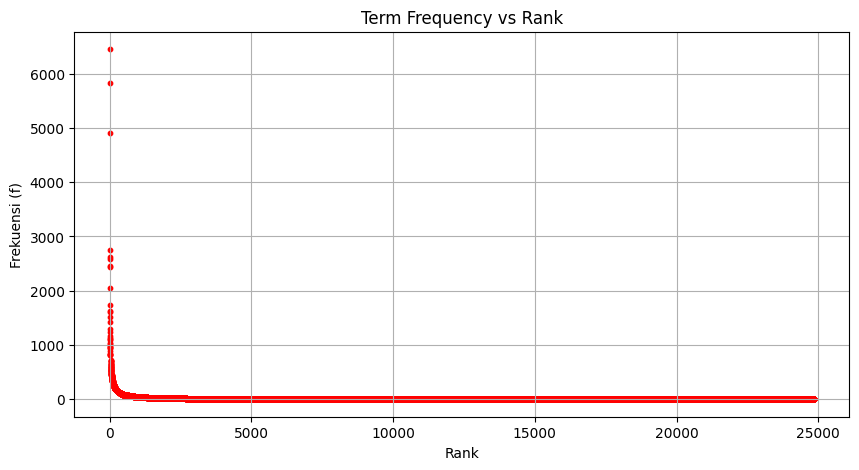

In [177]:
import matplotlib.pyplot as plt

rank = term_freq_df_sorted["rank"]
freq = term_freq_df_sorted["freq"]

plt.figure(figsize=(10, 5))
plt.scatter(rank, freq, color="red", s=10)
plt.title("Term Frequency vs Rank")
plt.xlabel("Rank")
plt.ylabel("Frekuensi (f)")
plt.grid(True)
plt.show()